In [11]:
import sys
print(sys.version)
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import datetime
import bson
import gzip
import pickle
from collections import Counter
%matplotlib inline

2.7.11 |Anaconda 2.0.1 (64-bit)| (default, Dec  6 2015, 18:08:32) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [232]:
known_influencers = [('Henrique Bastos', '@henriquebastos', 14227855),
('Michael Kennedy', '@mkennedy', 12953262),
('Talk Python Podcast', '@TalkPython', 3098427092),
('Russel Winder', '@russel_winder', 238541848),
('Richard Jones', '@r1chardj0n3s', 14379613),
('Mikko Ohtamaa', '@moo9000', 50703014),
('Tibor Sziráki', '@openerphu', 173394343),
('Data Science Renee', '@BecomingDataSci', 2343198944),
('steve_piercy', '@steve_piercy', 93713345)]
known_influencers_dict = {x[2]:x for x in known_influencers}
known_influencers_set = {x[2] for x in known_influencers}
def get_known_influencers(df):
    return [x for x in df['id'] if x in known_influencers_set]

In [1]:
import sys
print(sys.version)
from gensim import corpora, models
import pyLDAvis.gensim

2.7.11 |Anaconda 2.0.1 (64-bit)| (default, Dec  6 2015, 18:08:32) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [191]:
corpus = corpora.MmCorpus('sample_1000/alexip_followers_py27.mm')
dictionary = corpora.Dictionary.load('sample_1000/alexip_followers_py27.dict')

In [3]:
lda = models.LdaModel.load('alexip.lda')
followers_data =  pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.display(followers_data)

/home/dkorolev/anaconda/lib/python2.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:102: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.00318578017319 and the largest is 0.362549207622.
  RuntimeWarning


In [179]:
#followers_data

In [177]:
pyLDAvis.save_html(followers_data, 'followers_1000.html')

In [6]:
import gensim
#lda_vw = models.LdaModel.load('alexip_vw.lda')
lda_vw = gensim.models.wrappers.LdaVowpalWabbit.load('alexip_vw.lda')
followers_data_vw =  pyLDAvis.gensim.prepare(lda_vw, corpus, dictionary)
pyLDAvis.display(followers_data)

AttributeError: 'LdaVowpalWabbit' object has no attribute 'inference'

In [186]:
#topic_term_dists.shape

In [187]:
#np.sum(doc_topic_dists, axis=1)

In [193]:
term_frequency = [0]*len(dictionary.dfs)
for k, v in dictionary.dfs.items():
    term_frequency[k] = v

In [192]:
doc_lengths = []
for doc in corpus:
    doc_lengths.append(sum([x[1] for x in doc]))

In [195]:
num_topics = 40
topic_term_dists = np.zeros((num_topics, len(term_frequency)))
with open('sample_1000/vw_topics_1000.dat', 'r') as f:
    counter = 0
    for line in f:
        counter += 1
        if counter > 10:
            prob = [float(x) for x in line.split(' ')[1:-1]]
            for i in range(num_topics):
                topic_term_dists[i,(counter-11)%len(term_frequency)] += prob[i]
            #topic_term_dists.append(np.array())
#topic_term_dists = np.array(topic_term_dists)
#topic_term_dists = topic_term_dists[:len(term_frequency),:]

In [ ]:
#topic_term_dists.T/np.sum(topic_term_dists.T, axis=0)
#topic_term_dists = topic_term_dists.T
#topic_term_dists = topic_term_dists/np.sum(topic_term_dists, axis=0)
#topic_term_dists = topic_term_dists.T

In [196]:
doc_topic_dists = np.zeros((len(doc_lengths), num_topics))
with open('sample_1000/vw_prediction_1000.dat', 'r') as f:
    counter = 0
    for line in f:
        prob=[float(x) for x in line.split(' ')[:-1]]
        for i in range(num_topics):
            doc_topic_dists[counter%len(doc_lengths),i] += prob[i]
        counter += 1
        #doc_topic_dists.append(np.array([float(x) for x in line.split(' ')[:-1]]))
#doc_topic_dists = np.array(doc_topic_dists)
#doc_topic_dists = doc_topic_dists[:len(doc_lengths),:].T
#doc_topic_dists = doc_topic_dists.T
#doc_topic_dists = doc_topic_dists/np.sum(doc_topic_dists, axis=0)
#doc_topic_dists = doc_topic_dists.T

In [197]:
#(doc_topic_dists/np.sum(doc_topic_dists, axis=0)).shape

In [198]:
#np.sum(doc_topic_dists, axis=0).shape

In [200]:
#np.sum((doc_topic_dists.T/np.sum(doc_topic_dists.T, axis=0)).T, axis=1)

In [201]:
vocab = ['']*len(dictionary.token2id)
for k, v in dictionary.token2id.items():
    vocab[v] = k

In [202]:
data = {'topic_term_dists': (topic_term_dists.T/np.sum(topic_term_dists.T, axis=0)).T, 
            'doc_topic_dists': (doc_topic_dists.T/np.sum(doc_topic_dists.T, axis=0)).T,
            'doc_lengths': doc_lengths,
            'vocab': vocab,
            'term_frequency': term_frequency}

In [203]:
print('Topic-Term shape: %s' % str(np.array(data['topic_term_dists']).shape))
print('Doc-Topic shape: %s' % str(np.array(data['doc_topic_dists']).shape))

Topic-Term shape: (40, 25006)
Doc-Topic shape: (542, 40)


In [204]:
vis_data = pyLDAvis.prepare(**data)

/home/dkorolev/anaconda/lib/python2.7/site-packages/joblib-0.9.4-py2.7.egg/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/dkorolev/anaconda/lib/python2.7/site-packages/joblib-0.9.4-py2.7.egg/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/dkorolev/anaconda/lib/python2.7/site-packages/joblib-0.9.4-py2.7.egg/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead

In [205]:
pyLDAvis.display(vis_data)

In [206]:
pyLDAvis.save_html(vis_data, 'followers_1000_via_vw_2.html')

In [181]:
target_path = 'all'

In [183]:
corpus_all = corpora.MmCorpus(target_path + '/corpora_corpus.mm')
dictionary_all = corpora.Dictionary.load(target_path + '/corpora.dict')

In [184]:
lda_all = models.LdaModel.load(target_path + '/corpora.lda')
followers_data_all =  pyLDAvis.gensim.prepare(lda_all, corpus_all, dictionary_all)
pyLDAvis.display(followers_data_all)

In [314]:
pyLDAvis.save_html(followers_data_all, 'all_data.html')

In [207]:
target_path = 'subscibers'
corpus_subscibers = corpora.MmCorpus(target_path + '/corpora_corpus.mm')
dictionary_subscibers = corpora.Dictionary.load(target_path + '/corpora.dict')
lda_subscibers = models.LdaModel.load(target_path + '/corpora.lda')
followers_data_subscibers =  pyLDAvis.gensim.prepare(lda_subscibers, corpus_subscibers, dictionary_subscibers)
pyLDAvis.display(followers_data_subscibers)

In [315]:
pyLDAvis.save_html(followers_data_subscibers, 'all_subscibers.html')

In [300]:
fnames_argsort = np.asarray(list(dictionary.token2id.values()), dtype=np.int_)
topic = lda.state.get_lambda()
topic = topic / topic.sum(axis=1)[:, None]
topic_term_dists = topic[:, fnames_argsort]

In [301]:
topic_term_dists.sum(axis=1)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [210]:
predictions = pd.read_csv(target_path + '/corpora_predictions.csv', index_col=0)

In [220]:
predicted_influencers = []
for name, nickname, id in known_influencers:
    if id in predictions.index:
        predicted_influencers.append(id)
    else:
        print(name, nickname, id, 'Not topics')


('Henrique Bastos', '@henriquebastos', 14227855, 'Not topics')
('Richard Jones', '@r1chardj0n3s', 14379613, 'Not topics')


In [218]:
predictions.ix[predicted_influencers][predictions.columns[:20]]

topic_0   topic_1   topic_2  topic_3  topic_4  topic_5  topic_6  \
12953262    0.00000  0.222593  0.000000      0.0      0.0      0.0      0.0   
3098427092  0.00000  0.000000  0.000000      0.0      0.0      0.0      0.0   
238541848   0.00000  0.075879  0.000000      0.0      0.0      0.0      0.0   
50703014    0.03296  0.260713  0.000000      0.0      0.0      0.0      0.0   
173394343   0.00000  0.000000  0.000000      0.0      0.0      0.0      0.0   
2343198944  0.00000  0.000000  0.000000      0.0      0.0      0.0      0.0   
93713345    0.00000  0.202493  0.037699      0.0      0.0      0.0      0.0   

             topic_7  topic_8   topic_9  topic_10  topic_11  topic_12  \
12953262    0.000000      0.0  0.000000  0.000000       0.0  0.030974   
3098427092  0.000000      0.0  0.098707  0.000000       0.0  0.000000   
238541848   0.000000      0.0  0.052855  0.000000       0.0  0.000000   
50703014    0.000000      0.0  0.400158  0.028997       0.0  0.000000   
173394343   0.000000      0.0  0.000000  0.000000       0.0  0.000000   
2343198944  0.082081      0.0  0.065791  0.000000       0.0  0.000000   
93713345    0.000000      0.0  0.000000  0.000000       0.0  0.000000   

            topic_13  topic_14  topic_15  topic_16  topic_17  topic_18  \
12953262         0.0  0.000000       0.0  0.000000       0.0  0.000000   
3098427092       0.0  0.000000       0.0  0.024380       0.0  0.000000   
238541848        0.0  0.000000       0.0  0.000000       0.0  0.312212   
50703014         0.0  0.099938       0.0  0.000000       0.0  0.000000   
173394343        0.0  0.000000       0.0  0.000000       0.0  0.000000   
2343198944       0.0  0.000000       0.0  0.000000       0.0  0.000000   
93713345         0.0  0.000000       0.0  0.505218       0.0  0.000000   

            topic_19  
12953262         0.0  
3098427092       0.0  
238541848        0.0  
50703014         0.0  
173394343        0.0  
2343198944       0.0  
93713345         0.0

In [219]:
predictions.ix[predicted_influencers][predictions.columns[20:]]

topic_20  topic_21  topic_22  topic_23  topic_24  topic_25  \
12953262         0.0  0.000000       0.0       0.0  0.000000       0.0   
3098427092       0.0  0.000000       0.0       0.0  0.046182       0.0   
238541848        0.0  0.114068       0.0       0.0  0.000000       0.0   
50703014         0.0  0.000000       0.0       0.0  0.114719       0.0   
173394343        0.0  0.000000       0.0       0.0  0.000000       0.0   
2343198944       0.0  0.000000       0.0       0.0  0.000000       0.0   
93713345         0.0  0.065570       0.0       0.0  0.000000       0.0   

            topic_26  topic_27  topic_28  topic_29  topic_30  topic_31  \
12953262         0.0  0.349340       0.0  0.152143  0.019489       0.0   
3098427092       0.0  0.302716       0.0  0.446450  0.012103       0.0   
238541848        0.0  0.000000       0.0  0.405753  0.000000       0.0   
50703014         0.0  0.000000       0.0  0.052371  0.000000       0.0   
173394343        0.0  0.000000       0.0  0.000000  0.000000       0.0   
2343198944       0.0  0.137124       0.0  0.714648  0.000000       0.0   
93713345         0.0  0.188734       0.0  0.000000  0.000000       0.0   

            topic_32  topic_33  topic_34  topic_35  topic_36  topic_37  \
12953262         0.0       0.0  0.211215  0.013919       0.0   0.00000   
3098427092       0.0       0.0  0.053421  0.000000       0.0   0.00000   
238541848        0.0       0.0  0.000000  0.030689       0.0   0.00000   
50703014         0.0       0.0  0.000000  0.000000       0.0   0.00000   
173394343        0.0       0.0  0.000000  0.000000       0.0   0.99995   
2343198944       0.0       0.0  0.000000  0.000000       0.0   0.00000   
93713345         0.0       0.0  0.000000  0.000000       0.0   0.00000   

            topic_38  topic_39  
12953262         0.0       0.0  
3098427092       0.0       0.0  
238541848        0.0       0.0  
50703014         0.0       0.0  
173394343        0.0       0.0  
2343198944       0.0       0.0  
93713345         0.0       0.0

@henriquebastos был отфильтрован из-за языка: подавляющее количество постов на испанском.

@r1chardj0n3s - не было собрано твитов

In [230]:
topics_dict = dict()
for id in predicted_influencers:
    topics = []
    topics_dict[id] = topics
    user = predictions.ix[id]
    for col in predictions.columns:
        topics.append(user[col])

In [234]:
for id in predicted_influencers:
    descr = known_influencers_dict[id][1] + ' (' + str(id) + '): '
    user_topics = topics_dict[id]
    for x in reversed(np.argsort(user_topics)):
        if user_topics[x] > 0:
            descr += str(x + 1) + ' (' + str(user_topics[x]) + ') '
    print(descr)

@mkennedy (12953262): 28 (0.34933964975) 2 (0.22259293233) 35 (0.211215351921) 30 (0.152142907136) 13 (0.0309742391917) 31 (0.019489261694) 36 (0.0139190546517) 
@TalkPython (3098427092): 30 (0.446449552949) 28 (0.302716426488) 10 (0.0987070493166) 35 (0.053420904153) 25 (0.0461823679476) 17 (0.0243802922139) 31 (0.0121029776516) 
@russel_winder (238541848): 30 (0.405753295805) 19 (0.312212246964) 22 (0.114068131103) 2 (0.075878940093) 10 (0.0528554986115) 36 (0.0306892568874) 
@moo9000 (50703014): 10 (0.400158052321) 2 (0.260713276168) 25 (0.114719348433) 15 (0.0999379835803) 30 (0.0523711506552) 1 (0.0329600626197) 11 (0.0289967659219) 
@openerphu (173394343): 38 (0.999950447245) 
@BecomingDataSci (2343198944): 30 (0.714647559278) 28 (0.137124212252) 8 (0.0820807667371) 10 (0.0657911671962) 
@steve_piercy (93713345): 17 (0.505218116262) 2 (0.202492845182) 28 (0.18873371215) 22 (0.0655697667605) 3 (0.0376987684295) 


Тема 2: Разработка, python

Тема 10: США, война

Тема 17: Биткойны

Тема 19: политика, Нигерия

Тема 22: музыка, видео

Тема 25: Scala, Java, Kotlin

Тема 28: о Германии

Тема 29: о поиске работы

Тема 30: о купонах, скидках, халяве

Тема 35: openerp, hungary

Тема 38: Scala, keybase, verifying

Кластеризация по темам? почему бы и нет...

In [237]:
from sklearn.manifold import TSNE
all_tsne_model = TSNE(n_components=2, random_state=0)
all_tsne = all_tsne_model.fit_transform(predictions)

In [250]:
influencers_ids = [x for x in range(predictions.shape[0]) if predictions.index[x] in known_influencers_set]

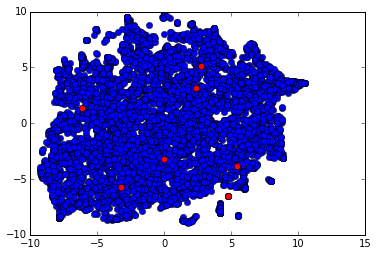

In [251]:
plt.plot(all_tsne[:,0], all_tsne[:,1], 'o')
plt.plot(all_tsne[influencers_ids,0], all_tsne[influencers_ids,1], 'or')

In [253]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(predictions, method='ward')

/home/dkorolev/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


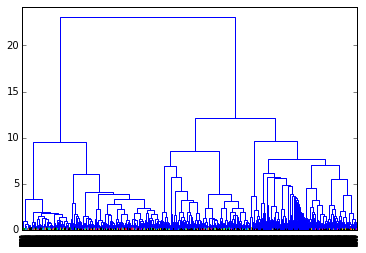

In [256]:
def hierarchy_draw(Z, labels, level):
    plt.figure()
    hierarchy.dendrogram(Z, labels=labels, color_threshold=level, leaf_font_size=5, count_sort=True)
    plt.show()
hierarchy_draw(Z, np.arange(predictions.shape[0]), 0.35)

In [290]:
def plot_clustering(X_2D, labels, axes, title=None, drawInf=True):
    clusters_count = len(set(labels))
    c_map = plt.cm.Spectral(np.linspace(0.5, 1, clusters_count))
    for i in range(1, clusters_count + 1):
        X_2D_part = X_2D[labels == i]
        axes.plot(X_2D_part[:, 0], X_2D_part[:, 1], 'o', color=c_map[i - 1])
    if drawInf:
        axes.plot(X_2D[influencers_ids,0], X_2D[influencers_ids,1], 'or')
    if title is not None:
        axes.set_title(title, size=17)

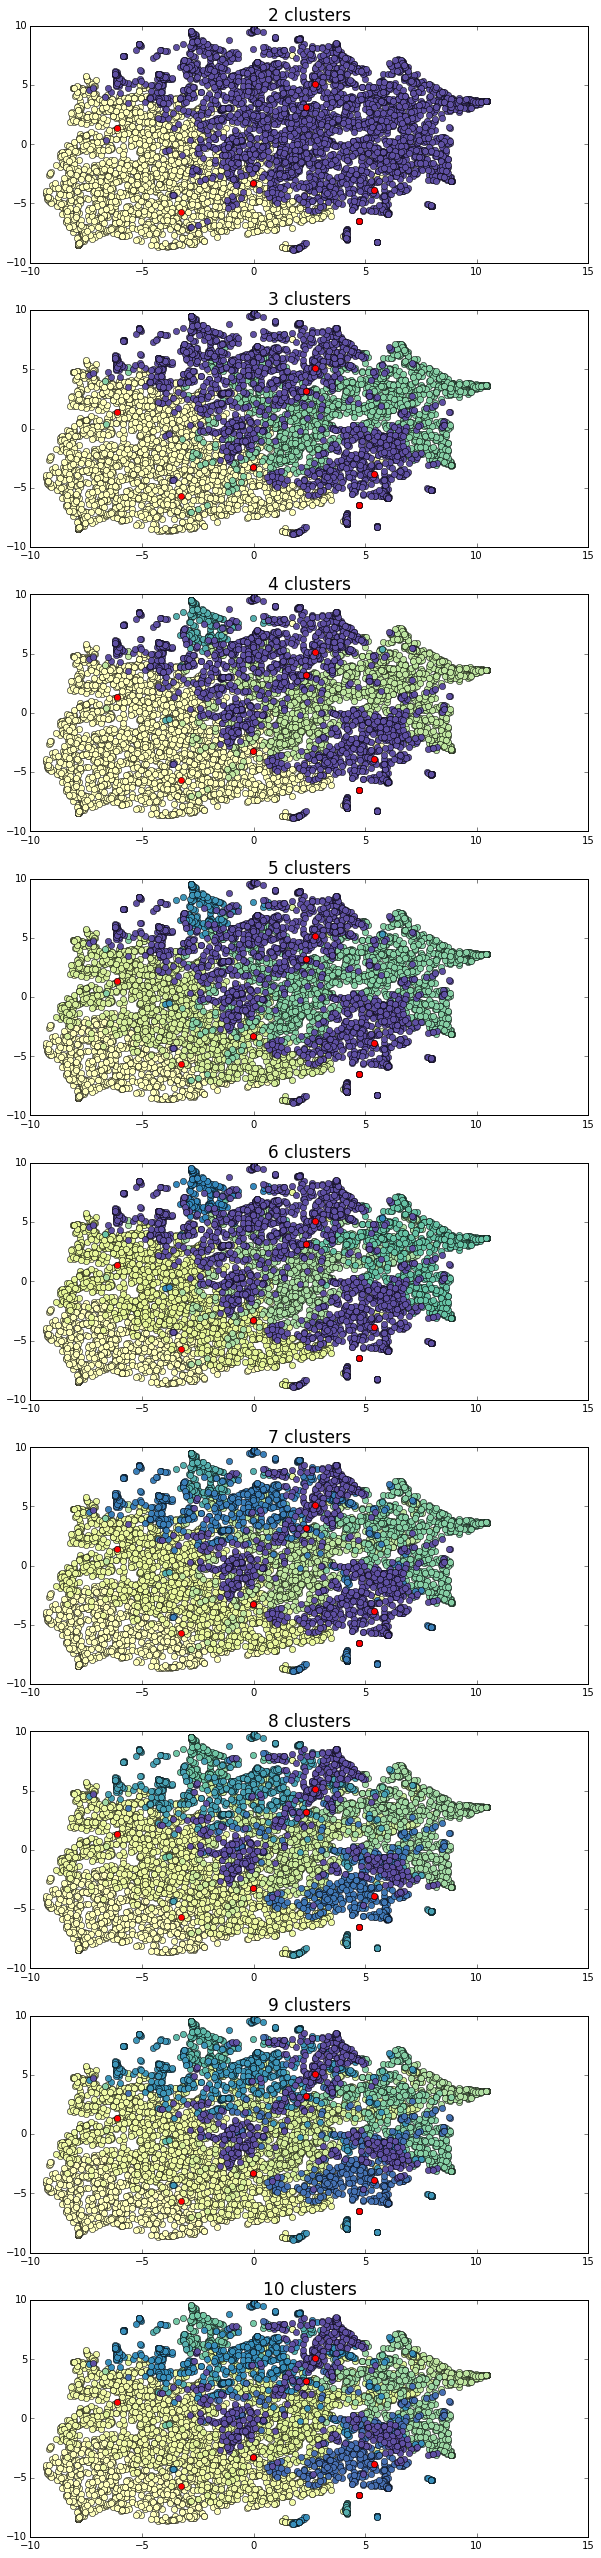

In [291]:
n_clusters = 10
fig, axes = plt.subplots(nrows=(n_clusters-1), ncols=1, figsize=(10, 5*(n_clusters - 1)))
for i in range(2,n_clusters + 1):
    labels = hierarchy.fcluster(Z, t=i, criterion='maxclust')
    plot_clustering(all_tsne, labels, axes[i-2], "%d clusters" % i)

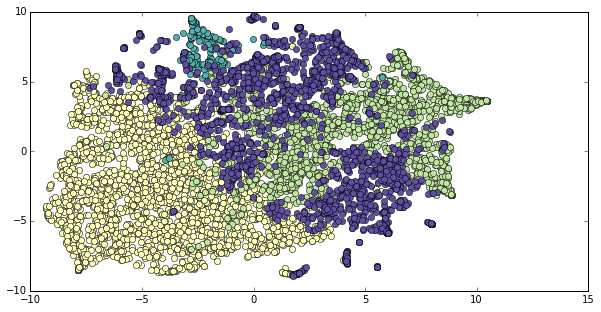

In [304]:
labels = hierarchy.fcluster(Z, t=4, criterion='maxclust')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
plot_clustering(all_tsne, labels, axes, drawInf=False)

In [306]:
labels[influencers_ids]

array([2, 4, 1, 1, 4, 4, 4], dtype=int32)

In [310]:
cluster_1_v2 = predictions.ix[predictions.index[labels == 1]]
cluster_1_v2[predictions.columns[:20]].describe()

topic_0      topic_1      topic_2      topic_3      topic_4  \
count  2562.000000  2562.000000  2562.000000  2562.000000  2562.000000   
mean      0.007168     0.043121     0.049545     0.001812     0.001943   
std       0.031040     0.062656     0.095405     0.010201     0.010544   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.079117     0.066851     0.000000     0.000000   
max       0.459507     0.430452     0.993543     0.209901     0.219624   

           topic_5      topic_6      topic_7      topic_8      topic_9  \
count  2562.000000  2562.000000  2562.000000  2562.000000  2562.000000   
mean      0.001207     0.044208     0.004156     0.002469     0.042717   
std       0.006728     0.066403     0.015320     0.017971     0.076895   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.077438     0.000000     0.000000     0.062350   
max       0.161056     0.464907     0.203502     0.521993     0.477838   

          topic_10     topic_11     topic_12     topic_13     topic_14  \
count  2562.000000  2562.000000  2562.000000  2562.000000  2562.000000   
mean      0.004066     0.001726     0.004724     0.007304     0.006644   
std       0.019808     0.012209     0.025187     0.026457     0.026151   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.350806     0.178076     0.430474     0.424646     0.326599   

          topic_15     topic_16     topic_17     topic_18     topic_19  
count  2562.000000  2562.000000  2562.000000  2562.000000  2562.000000  
mean      0.000123     0.018927     0.000411     0.039438     0.006028  
std       0.002016     0.039497     0.004457     0.063708     0.029560  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.021188     0.000000     0.062874     0.000000  
max       0.082491     0.401746     0.133089     0.367414     0.584986

In [311]:
cluster_1_v2[predictions.columns[20:]].describe()

topic_20     topic_21     topic_22     topic_23     topic_24  \
count  2562.000000  2562.000000  2562.000000  2562.000000  2562.000000   
mean      0.000239     0.041784     0.002480     0.003320     0.021059   
std       0.004724     0.075673     0.012479     0.014769     0.051171   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.060675     0.000000     0.000000     0.010866   
max       0.213302     0.655243     0.234626     0.245330     0.556534   

          topic_25     topic_26     topic_27     topic_28     topic_29  \
count  2562.000000  2562.000000  2562.000000  2562.000000  2562.000000   
mean      0.002607     0.006236     0.022096     0.000556     0.528132   
std       0.012521     0.022180     0.048998     0.005872     0.172641   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.410506   
50%       0.000000     0.000000     0.000000     0.000000     0.522583   
75%       0.000000     0.000000     0.000000     0.000000     0.641504   
max       0.237453     0.306275     0.348533     0.141652     0.999541   

          topic_30     topic_31     topic_32     topic_33     topic_34  \
count  2562.000000  2562.000000  2562.000000  2562.000000  2562.000000   
mean      0.002410     0.002877     0.003169     0.001245     0.034705   
std       0.015528     0.013761     0.015776     0.007734     0.061223   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.049137   
max       0.395563     0.279465     0.433532     0.183050     0.344041   

          topic_35     topic_36     topic_37     topic_38     topic_39  
count  2562.000000  2562.000000  2562.000000  2562.000000  2562.000000  
mean      0.017492     0.014994     0.000549     0.001451     0.000830  
std       0.034649     0.041758     0.005138     0.010038     0.006680  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.021503     0.000000     0.000000     0.000000     0.000000  
max       0.257433     0.403374     0.165728     0.142056     0.191621

Кластер о купонах, скидках, халяве

In [312]:
cluster_4_v2 = predictions.ix[predictions.index[labels == 4]]
cluster_4_v2[predictions.columns[:20]].describe()

topic_0      topic_1      topic_2      topic_3      topic_4  \
count  1786.000000  1786.000000  1786.000000  1786.000000  1786.000000   
mean      0.018521     0.082450     0.020278     0.006341     0.007988   
std       0.089797     0.100997     0.052508     0.035758     0.040825   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.043159     0.000000     0.000000     0.000000   
75%       0.000000     0.147537     0.000000     0.000000     0.000000   
max       0.999670     0.517926     0.428346     0.683162     0.774014   

           topic_5      topic_6      topic_7      topic_8      topic_9  \
count  1786.000000  1786.000000  1786.000000  1786.000000  1786.000000   
mean      0.002325     0.063088     0.011343     0.003065     0.098761   
std       0.017232     0.123330     0.037959     0.017843     0.156421   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.076326     0.000000     0.000000     0.155678   
max       0.499903     0.959663     0.478867     0.285266     0.994460   

          topic_10     topic_11     topic_12     topic_13     topic_14  \
count  1786.000000  1786.000000  1786.000000  1786.000000  1786.000000   
mean      0.007894     0.006149     0.011931     0.014409     0.017149   
std       0.040069     0.044944     0.058914     0.066741     0.071081   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.574634     0.999610     0.833360     0.987171     0.839874   

          topic_15     topic_16     topic_17     topic_18     topic_19  
count  1786.000000  1786.000000  1786.000000  1786.000000  1786.000000  
mean      0.000851     0.035013     0.000935     0.030045     0.001997  
std       0.025075     0.113616     0.023422     0.084783     0.010515  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.012127     0.000000     0.015449     0.000000  
max       0.999536     0.999672     0.980882     0.873040     0.139793

In [313]:
cluster_4_v2[predictions.columns[20:]].describe()

topic_20     topic_21     topic_22     topic_23     topic_24  \
count  1786.000000  1786.000000  1786.000000  1786.000000  1786.000000   
mean      0.000534     0.050685     0.008527     0.008696     0.061641   
std       0.012176     0.129028     0.065871     0.049114     0.097485   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.031624     0.000000     0.000000     0.096684   
max       0.499210     0.998378     0.999854     0.999895     0.550881   

          topic_25     topic_26     topic_27     topic_28     topic_29  \
count  1786.000000  1786.000000  1786.000000  1786.000000  1786.000000   
mean      0.006224     0.005184     0.117812     0.002983     0.129218   
std       0.043624     0.036405     0.165784     0.035418     0.129675   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.017712     0.000000     0.112002   
75%       0.000000     0.000000     0.195086     0.000000     0.229775   
max       0.999513     0.802047     0.994460     0.882476     0.533234   

          topic_30     topic_31     topic_32     topic_33     topic_34  \
count  1786.000000  1786.000000  1786.000000  1786.000000  1786.000000   
mean      0.007139     0.007563     0.003812     0.007045     0.053040   
std       0.038174     0.052857     0.035970     0.053368     0.088680   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.084111   
max       0.588455     0.998783     0.998702     0.887418     0.553866   

          topic_35     topic_36     topic_37     topic_38     topic_39  
count  1786.000000  1786.000000  1786.000000  1786.000000  1786.000000  
mean      0.026614     0.043794     0.004505     0.007972     0.002796  
std       0.081076     0.105031     0.046805     0.051084     0.033117  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.013672     0.036967     0.000000     0.000000     0.000000  
max       0.999409     0.921059     0.999950     0.954268     0.999153

Кластер о разработке, Германии, халяве

In [295]:
predictions[predictions['topic_1'] > 0.9].shape

(13, 40)

In [296]:
predictions[predictions['topic_1'] > 0.9]

topic_0   topic_1  topic_2  topic_3  topic_4  topic_5   topic_6  \
1941519523      0.0  0.935470      0.0      0.0      0.0      0.0  0.000000   
2533141657      0.0  0.997009      0.0      0.0      0.0      0.0  0.000000   
2540300568      0.0  0.962007      0.0      0.0      0.0      0.0  0.000000   
3179083369      0.0  0.946293      0.0      0.0      0.0      0.0  0.000000   
318003004       0.0  0.906089      0.0      0.0      0.0      0.0  0.000000   
4897599611      0.0  0.996761      0.0      0.0      0.0      0.0  0.000000   
922016503       0.0  0.956466      0.0      0.0      0.0      0.0  0.000000   
9609702         0.0  0.948015      0.0      0.0      0.0      0.0  0.000000   
96098247        0.0  0.937286      0.0      0.0      0.0      0.0  0.000000   
97365699        0.0  0.918932      0.0      0.0      0.0      0.0  0.080414   
983292930       0.0  0.984417      0.0      0.0      0.0      0.0  0.000000   
98388540        0.0  0.905201      0.0      0.0      0.0      0.0  0.000000   
9952            0.0  0.902479      0.0      0.0      0.0      0.0  0.000000   

            topic_7   topic_8   topic_9    ...     topic_30  topic_31  \
1941519523      0.0  0.000000  0.000000    ...          0.0       0.0   
2533141657      0.0  0.000000  0.000000    ...          0.0       0.0   
2540300568      0.0  0.000000  0.000000    ...          0.0       0.0   
3179083369      0.0  0.000000  0.000000    ...          0.0       0.0   
318003004       0.0  0.053246  0.000000    ...          0.0       0.0   
4897599611      0.0  0.000000  0.000000    ...          0.0       0.0   
922016503       0.0  0.000000  0.000000    ...          0.0       0.0   
9609702         0.0  0.000000  0.000000    ...          0.0       0.0   
96098247        0.0  0.000000  0.000000    ...          0.0       0.0   
97365699        0.0  0.000000  0.000000    ...          0.0       0.0   
983292930       0.0  0.000000  0.000000    ...          0.0       0.0   
98388540        0.0  0.000000  0.000000    ...          0.0       0.0   
9952            0.0  0.000000  0.080199    ...          0.0       0.0   

            topic_32  topic_33  topic_34  topic_35  topic_36  topic_37  \
1941519523       0.0       0.0  0.000000       0.0  0.000000       0.0   
2533141657       0.0       0.0  0.000000       0.0  0.000000       0.0   
2540300568       0.0       0.0  0.000000       0.0  0.000000       0.0   
3179083369       0.0       0.0  0.000000       0.0  0.000000       0.0   
318003004        0.0       0.0  0.000000       0.0  0.000000       0.0   
4897599611       0.0       0.0  0.000000       0.0  0.000000       0.0   
922016503        0.0       0.0  0.000000       0.0  0.000000       0.0   
9609702          0.0       0.0  0.000000       0.0  0.016504       0.0   
96098247         0.0       0.0  0.000000       0.0  0.000000       0.0   
97365699         0.0       0.0  0.000000       0.0  0.000000       0.0   
983292930        0.0       0.0  0.000000       0.0  0.000000       0.0   
98388540         0.0       0.0  0.083643       0.0  0.000000       0.0   
9952             0.0       0.0  0.000000       0.0  0.000000       0.0   

            topic_38  topic_39  
1941519523       0.0  0.000000  
2533141657       0.0  0.000000  
2540300568       0.0  0.000000  
3179083369       0.0  0.000000  
318003004        0.0  0.000000  
4897599611       0.0  0.000000  
922016503        0.0  0.000000  
9609702          0.0  0.000000  
96098247         0.0  0.000000  
97365699         0.0  0.000000  
983292930        0.0  0.000000  
98388540         0.0  0.010759  
9952             0.0  0.000000  

[13 rows x 40 columns]

In [298]:
predictions[predictions['topic_24'] > 0.9].shape

(7, 40)

In [299]:
predictions[predictions['topic_24'] > 0.9]

topic_0   topic_1  topic_2  topic_3  topic_4  topic_5   topic_6  \
2792550337      0.0  0.000000      0.0      0.0  0.08797      0.0  0.000000   
3012648389      0.0  0.000000      0.0      0.0  0.00000      0.0  0.000000   
589090738       0.0  0.000000      0.0      0.0  0.00000      0.0  0.000000   
785021640       0.0  0.000000      0.0      0.0  0.00000      0.0  0.000000   
919534141       0.0  0.025295      0.0      0.0  0.00000      0.0  0.000000   
965626086       0.0  0.000000      0.0      0.0  0.00000      0.0  0.089228   
970041499       0.0  0.034916      0.0      0.0  0.00000      0.0  0.000000   

            topic_7  topic_8  topic_9    ...     topic_30  topic_31  topic_32  \
2792550337      0.0      0.0      0.0    ...          0.0       0.0       0.0   
3012648389      0.0      0.0      0.0    ...          0.0       0.0       0.0   
589090738       0.0      0.0      0.0    ...          0.0       0.0       0.0   
785021640       0.0      0.0      0.0    ...          0.0       0.0       0.0   
919534141       0.0      0.0      0.0    ...          0.0       0.0       0.0   
965626086       0.0      0.0      0.0    ...          0.0       0.0       0.0   
970041499       0.0      0.0      0.0    ...          0.0       0.0       0.0   

            topic_33  topic_34  topic_35  topic_36  topic_37  topic_38  \
2792550337       0.0       0.0       0.0  0.000000       0.0       0.0   
3012648389       0.0       0.0       0.0  0.000000       0.0       0.0   
589090738        0.0       0.0       0.0  0.000000       0.0       0.0   
785021640        0.0       0.0       0.0  0.000000       0.0       0.0   
919534141        0.0       0.0       0.0  0.000000       0.0       0.0   
965626086        0.0       0.0       0.0  0.000000       0.0       0.0   
970041499        0.0       0.0       0.0  0.023043       0.0       0.0   

            topic_39  
2792550337       0.0  
3012648389       0.0  
589090738        0.0  
785021640        0.0  
919534141        0.0  
965626086        0.0  
970041499        0.0  

[7 rows x 40 columns]